<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Path-Graphs" data-toc-modified-id="Path-Graphs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Path Graphs</a></span></li><li><span><a href="#Spectral-Graph-Drawing----a-grid-graph" data-toc-modified-id="Spectral-Graph-Drawing----a-grid-graph-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Spectral Graph Drawing -- a grid graph</a></span></li><li><span><a href="#Spectral-Graph-Drawing----The-Yale-Logo" data-toc-modified-id="Spectral-Graph-Drawing----The-Yale-Logo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Spectral Graph Drawing -- The Yale Logo</a></span></li><li><span><a href="#Isomorphism" data-toc-modified-id="Isomorphism-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Isomorphism</a></span></li><li><span><a href="#The-dodecahedron" data-toc-modified-id="The-dodecahedron-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The dodecahedron</a></span></li></ul></div>

This is a Jupyter Notebook that contains Julia code I will run in the first lecture of Spectral Graph Theory.  I find experiments to be incredibly useful when working on spectral graph theory.  They help me figure out what is true, and they help me find counterexamples to my conjectures.

If you want to try using this, you will need to install Jupyter (via Python), Julia and IJulia.  You also need my package, called `Laplacians.jl`.  It may be added in Julia via

~~~
Using Pkg
Pkg.add("Laplacians")
~~~

In [28]:
using Laplacians
using LinearAlgebra
using Statistics
using Plots
using SparseArrays
using FileIO
using JLD2
using Random

# Path Graphs

In [2]:
M = path_graph(4)

4×4 SparseMatrixCSC{Float64,Int64} with 6 stored entries:
  [2, 1]  =  1.0
  [1, 2]  =  1.0
  [3, 2]  =  1.0
  [2, 3]  =  1.0
  [4, 3]  =  1.0
  [3, 4]  =  1.0

In [3]:
Matrix(M)

4×4 Array{Float64,2}:
 0.0  1.0  0.0  0.0
 1.0  0.0  1.0  0.0
 0.0  1.0  0.0  1.0
 0.0  0.0  1.0  0.0

In [4]:
Matrix(lap(M))

4×4 Array{Float64,2}:
  1.0  -1.0   0.0   0.0
 -1.0   2.0  -1.0   0.0
  0.0  -1.0   2.0  -1.0
  0.0   0.0  -1.0   1.0

In [5]:
L = lap(path_graph(10))
;

In [6]:
E = eigen(Matrix(L))
println(E.values)

[0.0, 0.097887, 0.381966, 0.824429, 1.38197, 2.0, 2.61803, 3.17557, 3.61803, 3.90211]


In [7]:
E.vectors[:,1]

10-element Array{Float64,1}:
 0.31622776601683755
 0.31622776601683716
 0.31622776601683766
 0.3162277660168381 
 0.31622776601683855
 0.3162277660168381 
 0.3162277660168385 
 0.31622776601683805
 0.3162277660168378 
 0.3162277660168378 

In [8]:
v2 = E.vectors[:,2]

10-element Array{Float64,1}:
 -0.44170765403093937
 -0.39847023129620024
 -0.316227766016838  
 -0.20303072371134553
 -0.06995961957075425
  0.06995961957075386
  0.2030307237113457 
  0.31622776601683766
  0.3984702312961997 
  0.4417076540309382 

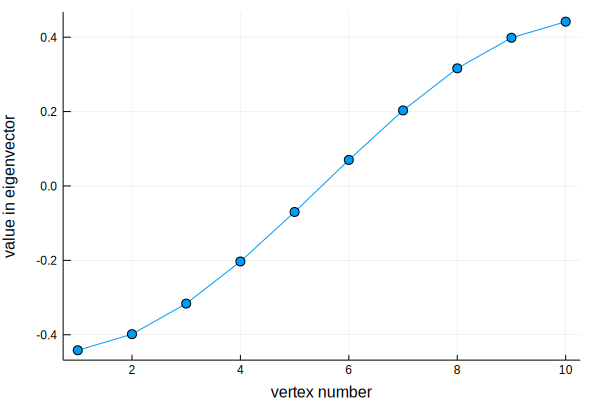

In [9]:
plot(v2,marker=5,legend=false)
xlabel!("vertex number")
ylabel!("value in eigenvector")

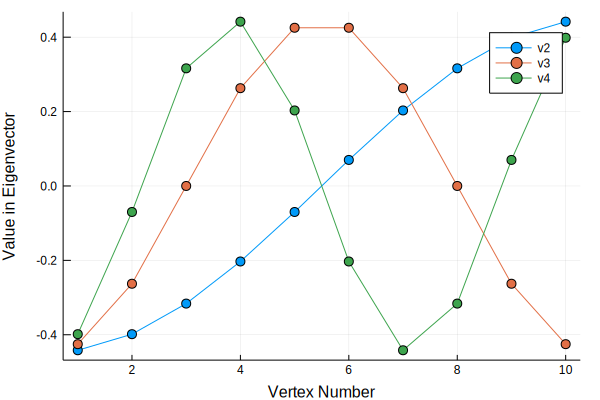

In [10]:
Plots.plot(E.vectors[:,2],label="v2",marker = 5)
Plots.plot!(E.vectors[:,3],label="v3",marker = 5)
Plots.plot!(E.vectors[:,4],label="v4",marker = 5)
xlabel!("Vertex Number")
ylabel!("Value in Eigenvector")

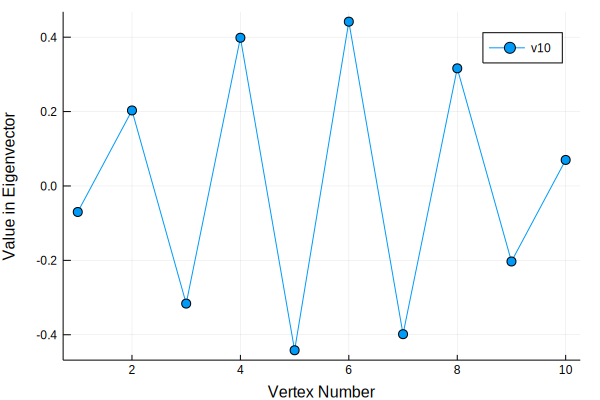

In [11]:
Plots.plot(E.vectors[:,10],label="v10",marker=5)
xlabel!("Vertex Number")
ylabel!("Value in Eigenvector")

# Spectral Graph Drawing -- a grid graph

In [12]:
M = grid2(3,4)
L = lap(M)
E = eigen(Matrix(L))
V = E.vectors[:,2:3]

12×2 Array{Float64,2}:
 -0.377172   0.353553   
 -0.15623    0.353553   
  0.15623    0.353553   
  0.377172   0.353553   
 -0.377172  -1.66533e-16
 -0.15623   -4.16334e-16
  0.15623   -5.82867e-16
  0.377172   2.77556e-16
 -0.377172  -0.353553   
 -0.15623   -0.353553   
  0.15623   -0.353553   
  0.377172  -0.353553   

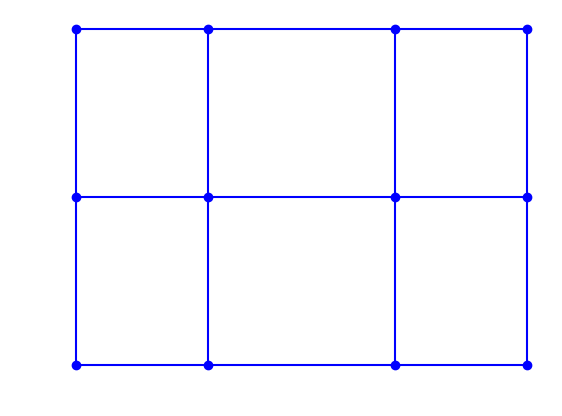

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x132c72490>

In [13]:
plot_graph(M,V[:,1],V[:,2])

# Spectral Graph Drawing -- The Yale Logo

In [14]:
using PyPlot: pygui
pygui(false)

false

In [15]:
@load "YALE.jld2"

4-element Array{Symbol,1}:
 :a 
 :xy
 :v2
 :v3

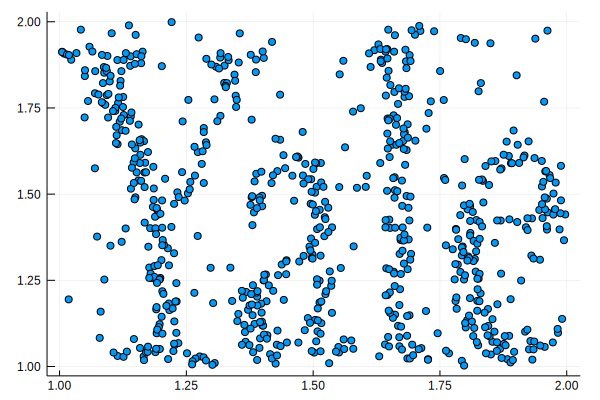

In [16]:
scatter(xy[:,1],xy[:,2],legend=false)

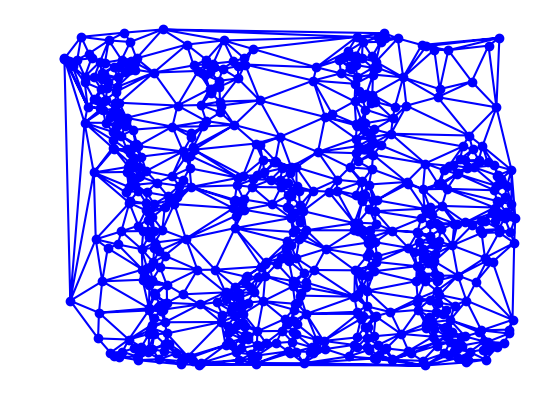

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x133189610>

In [17]:
plot_graph(a,xy[:,1],xy[:,2])

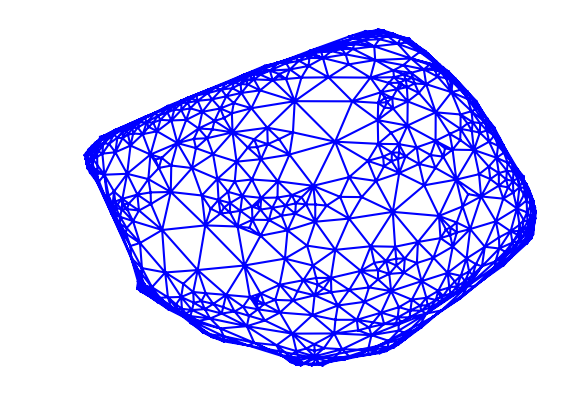

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13eb5c110>

In [18]:
plot_graph(a, v2,v3, dots=false)

# Isomorphism

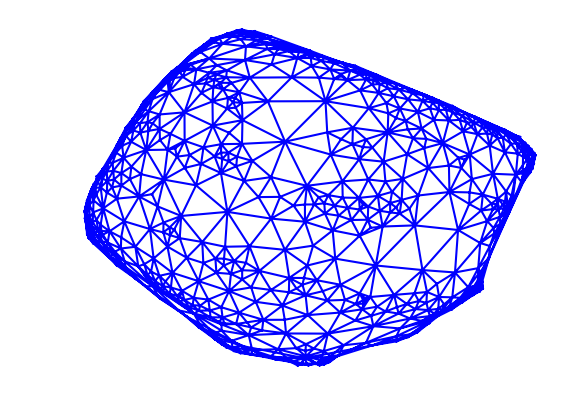

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x133f80290>

In [32]:
Random.seed!(1)
p = randperm(size(a,1))
M = a[p,p]
E = eigen(Matrix(lap(M)))
V = E.vectors[:,2:3]
plot_graph(M,V[:,1],V[:,2], dots=false)

In [34]:
M = latin_square_graph(5);
println(eigvals(Matrix(lap(M))))

[0.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]


# The dodecahedron

In [35]:
M = readIJV("dodec.txt")

20×20 SparseMatrixCSC{Float64,Int64} with 60 stored entries:
  [2 ,  1]  =  1.0
  [5 ,  1]  =  1.0
  [16,  1]  =  1.0
  [1 ,  2]  =  1.0
  [3 ,  2]  =  1.0
  [15,  2]  =  1.0
  [2 ,  3]  =  1.0
  [4 ,  3]  =  1.0
  [13,  3]  =  1.0
  [3 ,  4]  =  1.0
  [5 ,  4]  =  1.0
  [8 ,  4]  =  1.0
  ⋮
  [15, 17]  =  1.0
  [16, 17]  =  1.0
  [20, 17]  =  1.0
  [6 , 18]  =  1.0
  [16, 18]  =  1.0
  [19, 18]  =  1.0
  [9 , 19]  =  1.0
  [18, 19]  =  1.0
  [20, 19]  =  1.0
  [12, 20]  =  1.0
  [17, 20]  =  1.0
  [19, 20]  =  1.0

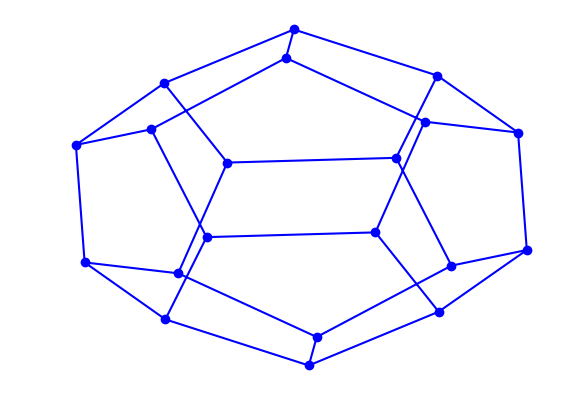

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x137d25c50>

In [36]:
spectral_drawing(M)

In [37]:
E = eigen(Matrix(lap(M)))
println(E.values)

[-8.88178e-16, 0.763932, 0.763932, 0.763932, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.23607, 5.23607, 5.23607]


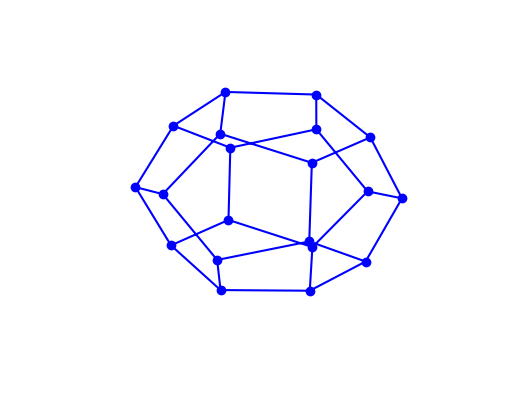

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x13e6bd6d0>

In [38]:
x = E.vectors[:,2]
y = E.vectors[:,3]
z = E.vectors[:,4]
pygui(false)
plot_graph(M, x, y, z; setaxis=false)

In [23]:
pygui(true)
plot_graph(M, x, y, z; setaxis=false)

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x144c93410>

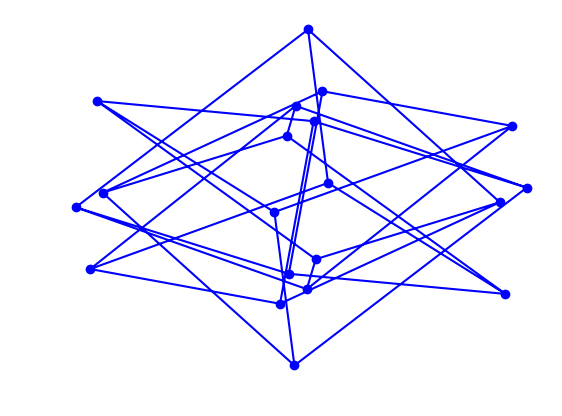

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14a0a9810>

In [41]:
x = E.vectors[:,11]
y = E.vectors[:,12]
pygui(false)
plot_graph(M, x, y; setaxis=false)

In [43]:
x = E.vectors[:,11]
y = E.vectors[:,12]
z = E.vectors[:,10]
pygui(true)
plot_graph(M, x, y, z; setaxis=false)

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x14a0c0b90>